# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

* Observed Trend 1: Temperature is higher in the Equatorial region
* Observed Trend 2: Percentage of cloud cover is higher in the higher further away from the Equator
* Observed Trend 3: Maximum Wind Speed is higher in the Equatorial region

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-180, 180)
lng_range = (-360, 360)

today = date.today()

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-180.000, high=180.000, size=6000)
lngs = np.random.uniform(low=-360.000, high=360.000, size=6000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"APPID": api_key, "units": "imperial", "lang": "EN"}
keys = ["clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon","main.temp_max", "wind.speed"]
df = pd.DataFrame(columns=['City','Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed'])

# Write a logfile of each city as it is being processed with the city name and number
logfile = open("output_data/cities.log", "w")

print("Beginning Data Retrieval")
print("-----------------------------")

i = 0
setCnt = 1

for city in cities:
    
    i = i + 1
    
    print(f"Processing Record {i} of Set {setCnt} | {city}")
    
    try:
        data = owm.get_current(city, **settings)
        df = df.append({'City':city, 'Cloudiness':data('clouds.all'), 'Country':data('sys.country'), 'Date':data('dt'),
                        'Humidity':data('main.humidity'),'Lat':data('coord.lat'),'Lng':data('coord.lon'),
                        'Max Temp': data("main.temp_max"),'Wind Speed': data("wind.speed")}, ignore_index=True)
        logfile.write(f"{city},{data('id')}\n")
    except:
        print("City not found. Skipping...")   

    if i == 25:
        print('Sleeping...')
        time.sleep(40)
        i = 0
        setCnt = setCnt + 1
    
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

logfile.close()


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 10 of Set 1 | beringovskiy
Processing Record 11 of Set 1 | tolaga bay
Processing Record 12 of Set 1 | wajir
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | asau
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | yar-sale
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | waipawa
Processing Record 20 of Set 1 | hobart
Proces

Processing Record 5 of Set 8 | kolondieba
Processing Record 6 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 7 of Set 8 | jaltenango
Processing Record 8 of Set 8 | ribeira grande
Processing Record 9 of Set 8 | severo-kurilsk
Processing Record 10 of Set 8 | port angeles
Processing Record 11 of Set 8 | laizhou
Processing Record 12 of Set 8 | souillac
Processing Record 13 of Set 8 | klaksvik
Processing Record 14 of Set 8 | sembe
City not found. Skipping...
Processing Record 15 of Set 8 | rio gallegos
Processing Record 16 of Set 8 | maceio
Processing Record 17 of Set 8 | centenario do sul
Processing Record 18 of Set 8 | bani
Processing Record 19 of Set 8 | esperance
Processing Record 20 of Set 8 | babanusah
City not found. Skipping...
Processing Record 21 of Set 8 | springbok
Processing Record 22 of Set 8 | labuhan
Processing Record 23 of Set 8 | birjand
Processing Record 24 of Set 8 | acajutla
Processing Record 25 of Set 8 | montepuez
Sleeping...
Processing Record 1 o

Processing Record 12 of Set 15 | otjimbingwe
Processing Record 13 of Set 15 | clyde river
Processing Record 14 of Set 15 | ampanihy
Processing Record 15 of Set 15 | chagda
City not found. Skipping...
Processing Record 16 of Set 15 | celendin
Processing Record 17 of Set 15 | gaoual
Processing Record 18 of Set 15 | namibe
Processing Record 19 of Set 15 | meadow lake
Processing Record 20 of Set 15 | ambilobe
Processing Record 21 of Set 15 | casay
Processing Record 22 of Set 15 | wageningen
Processing Record 23 of Set 15 | igboho
Processing Record 24 of Set 15 | coruche
Processing Record 25 of Set 15 | belaya gora
Sleeping...
Processing Record 1 of Set 16 | gisborne
Processing Record 2 of Set 16 | morrope
Processing Record 3 of Set 16 | cururupu
Processing Record 4 of Set 16 | antalaha
Processing Record 5 of Set 16 | mecca
Processing Record 6 of Set 16 | chifeng
Processing Record 7 of Set 16 | ostrovnoy
Processing Record 8 of Set 16 | wattegama
Processing Record 9 of Set 16 | petropavlovsk

Processing Record 17 of Set 22 | burica
City not found. Skipping...
Processing Record 18 of Set 22 | villa union
Processing Record 19 of Set 22 | arlit
Processing Record 20 of Set 22 | balkhash
Processing Record 21 of Set 22 | dingle
Processing Record 22 of Set 22 | evinayong
Processing Record 23 of Set 22 | tabukiniberu
City not found. Skipping...
Processing Record 24 of Set 22 | talcher
Processing Record 25 of Set 22 | asfi
City not found. Skipping...
Sleeping...
Processing Record 1 of Set 23 | tahoua
Processing Record 2 of Set 23 | falkenberg
Processing Record 3 of Set 23 | east london
Processing Record 4 of Set 23 | ust-kuyga
Processing Record 5 of Set 23 | noyon
Processing Record 6 of Set 23 | general roca
Processing Record 7 of Set 23 | muhoroni
Processing Record 8 of Set 23 | kirkwall
Processing Record 9 of Set 23 | sabang
Processing Record 10 of Set 23 | sechura
Processing Record 11 of Set 23 | ponta delgada
Processing Record 12 of Set 23 | laguna
Processing Record 13 of Set 23

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
export_csv = df.to_csv ('output_data/export_dataframe.csv', index = None, header=True) 

df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,75,ZA,1567687732,63,-34.53,20.04,63,23.04
1,barrow,79,AR,1567687732,74,-38.31,-60.23,37.16,6.53
2,vaini,75,IN,1567687732,88,15.34,74.49,73.4,13.87
3,leningradskiy,92,RU,1567687732,92,69.38,178.42,39.5,3.22
4,mataura,100,NZ,1567687732,93,-46.19,168.86,46.99,3.87


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,solnechnyy,100,RU,1567680841,98,50.72,136.64,60.37,4.52
1,yellowknife,90,CA,1567680841,93,62.45,-114.38,46.40,8.05
2,benavente,20,ES,1567680841,39,42.00,-5.67,70.00,5.82
3,amapa,20,HN,1567680842,83,15.09,-87.97,77.00,4.70
4,souillac,90,FR,1567680842,59,45.60,-0.60,68.00,8.05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 9 columns):
City          532 non-null object
Cloudiness    532 non-null object
Country       532 non-null object
Date          532 non-null object
Humidity      532 non-null object
Lat           532 non-null float64
Lng           532 non-null float64
Max Temp      532 non-null object
Wind Speed    532 non-null float64
dtypes: float64(3), object(6)
memory usage: 37.5+ KB


City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<module 'matplotlib.pyplot' from '/Users/victordituro/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

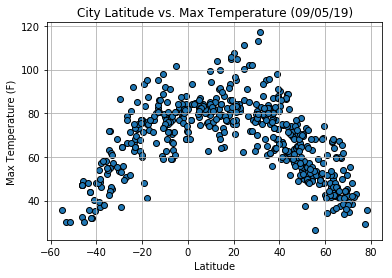

In [6]:

latitude_x = df['Lat']
max_temp_y = df['Max Temp']

# Generate the Graph
plt.scatter(
    latitude_x, 
    max_temp_y, 
    edgecolors="black", label="Test")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({today.strftime("%m/%d/%y")})')
plt.grid()

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Max_Temp.png")

plt

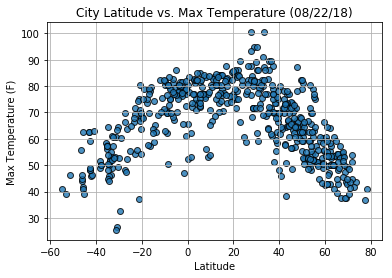

#### Latitude vs. Humidity Plot

<module 'matplotlib.pyplot' from '/Users/victordituro/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

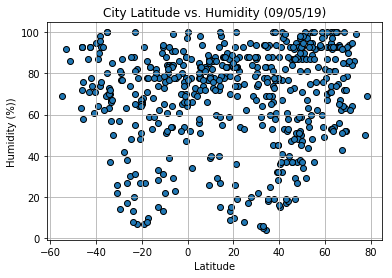

In [7]:

latitude_x = df['Lat']
humidity_y = df['Humidity']

# Generate the Graph
plt.scatter(
    latitude_x, 
    humidity_y, 
    edgecolors="black", label="Test")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title(f'City Latitude vs. Humidity ({today.strftime("%m/%d/%y")})')
plt.grid()

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Humidity.png")

plt

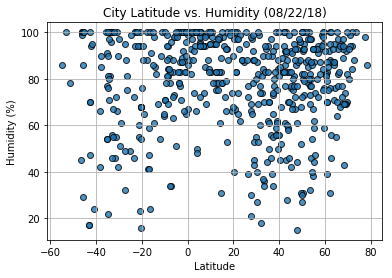

#### Latitude vs. Cloudiness Plot

<module 'matplotlib.pyplot' from '/Users/victordituro/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

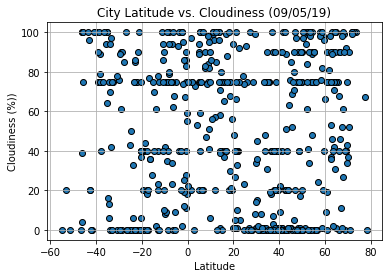

In [8]:

latitude_x = df['Lat']
cloudiness_y = df['Cloudiness']

# Generate the Graph
plt.scatter(
    latitude_x, 
    cloudiness_y, 
    edgecolors="black", label="Test")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title(f'City Latitude vs. Cloudiness ({today.strftime("%m/%d/%y")})')
plt.grid()

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Cloudiness.png")

plt

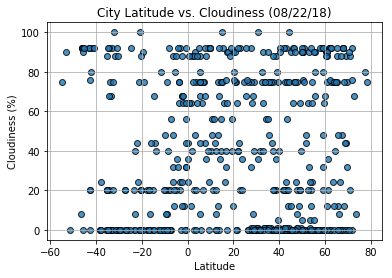

#### Latitude vs. Wind Speed Plot

<module 'matplotlib.pyplot' from '/Users/victordituro/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

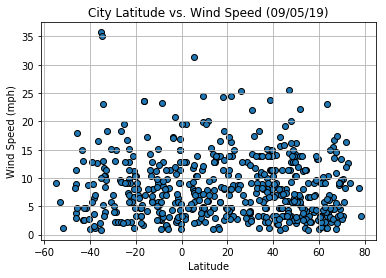

In [9]:

latitude_x = df['Lat']
wind_speed_y = df['Wind Speed']

# Generate the Graph
plt.scatter(
    latitude_x, 
    wind_speed_y, 
    edgecolors="black", label="Test")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({today.strftime("%m/%d/%y")})')
plt.grid()

# Save Figure
plt.savefig("./output_data/City_Latitude_vs_Wind_Speed.png")

plt

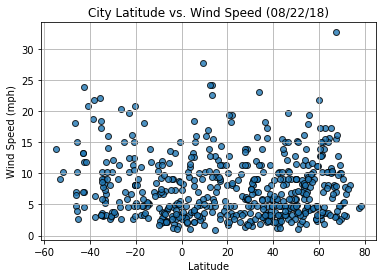